In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import socket, struct
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('ixchariot.csv')
df = df.drop('mix', axis=1)

In [ ]:
df = pd.get_dummies(df, columns=['user', 'Source IP', 'Destination IP'])

In [ ]:
cols = list(df)
df = df[cols[0:2] + cols[13:] + cols[2:13]]

In [ ]:
df.columns.tolist()[-10:]

In [ ]:
def cat(x):
    label = -1
    if x == 'BitTorrent File Download':
        label = 0
    elif x == 'Netflix Service Provider':
        label = 1
    elif x == 'HTTP Flash Video':
        label = 2
    elif x == 'Facebook':
        label = 3
    
    return label

df['application'] = df['application'].apply(cat)
df = df.drop('Total Measured Time',1)

In [ ]:
def ip_to_int(ip):
    ''' ip is a string '''
    i = socket.inet_aton(ip)
    return struct.unpack(">L", i)[0]

In [ ]:
# convert all bytes into the natural log
n = df.iloc[:,-10:]
n = np.log(n)
df.iloc[:,-10:] = n.replace(-np.inf, 0)

In [ ]:
# completely 0
#df['bytes_loss'] = df['Total Bytes Received'] - df['Total Bytes Sent']
#df['bytes_loss_1'] = df['Total Bytes Received By Destination'] - df['Total Bytes Sent By Source']
#df['bytes_loss_2'] = df['Total Bytes Received By Source'] - df['Total Bytes Sent By Destination']

In [ ]:
#f, ax = plt.subplots(1,2, figsize=(13,4))
#bt = df[(df['Destination IP'] == '10.0.21.3')]
#ax[0].plot(bt['Total Bytes Sent'], 'b--', alpha=0.6,label='sent')
#ax[0].plot(bt['Total Bytes Received'], 'r--', alpha=0.4,label='received')

KeyError: 'Destination IP'

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1236: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to Bitstream Vera Sans
  (prop.get_family(), self.defaultFamily[fontext]))
/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


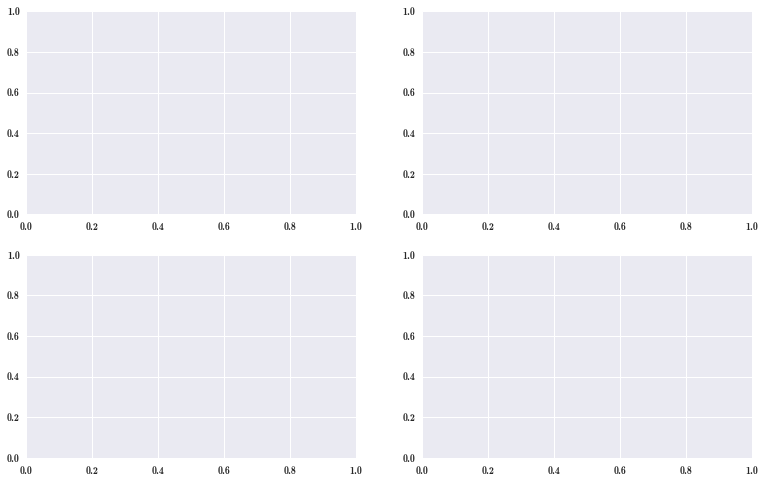

In [5]:
f, ax = plt.subplots(2,2, figsize=(13,8))

bt = df[(df['application'] == 0) & (df['Destination IP'] == '10.0.24.3')]
ax[0,0].plot(bt['Total Bytes Sent'], 'b--', alpha=0.6,label='sent')
ax[0,0].plot(bt['Total Bytes Received'], 'r--', alpha=0.4,label='received')
ax[0,0].set_title('FB util5')

bt = df[(df['application'] == 0) & (df['Destination IP'] == '10.0.21.3')]
ax[0,1].plot(bt['Total Bytes Sent'], 'b--', alpha=0.6,label='sent')
ax[0,1].plot(bt['Total Bytes Received'], 'r--', alpha=0.4,label='received')
ax[0,1].set_title('FB util2')

bt = df[(df['application'] == 1) & (df['Destination IP'] == '10.0.24.3')]
ax[1,0].plot(bt['Total Bytes Sent'], 'b--', alpha=0.6,label='sent')
ax[1,0].plot(bt['Total Bytes Received'], 'r--', alpha=0.4,label='received')
ax[1,0].set_title('Netflix util5')

bt = df[(df['application'] == 1) & (df['Destination IP'] == '10.0.21.3')]
ax[1,1].plot(bt['Total Bytes Sent'], 'b--', alpha=0.6,label='sent')
ax[1,1].plot(bt['Total Bytes Received'], 'r--', alpha=0.4,label='received')
ax[1,1].set_title('Netflix util2')

plt.legend()

In [ ]:
# remove all rows with all 0s
d = df.iloc[:,-10:]
idx = d[(d.T != 0).any()].index.tolist()
df = df.iloc[idx]

In [ ]:
# downsample the data, randomly selecting a row for every 10
# np.random.seed(42)
# r = 0
# kf = pd.DataFrame()
# while r < df.shape[0]:
#     rows = df.iloc[r:r+10,:]
#     c = np.random.choice(rows.index.tolist(), size=1, replace=False)
#     kf = kf.append(rows.ix[c[0]])
#     r = r + 10

# kf = kf[df.columns]
# kf.to_csv('downsample.csv')

In [6]:
df = pd.read_csv('downsample.csv', index_col=0)

In [7]:
df.iloc[:,-10:].head()

,Throughput,Avg Throughput,Min Throughput,Max Throughput,Total Bytes Sent,Total Bytes Sent By Source,Total Bytes Sent By Destination,Total Bytes Received,Total Bytes Received By Source,Total Bytes Received By Destination
16,17.582384,17.582384,17.582384,17.582384,16.196090,16.191321,10.847957,16.196090,10.847957,16.191321
19,17.604909,17.604909,17.604909,17.604909,16.218614,16.213910,10.857055,16.218614,10.857055,16.213910
62,16.221942,15.528795,0.000000,16.221942,14.835648,14.813051,11.034422,14.835648,11.034422,14.813051
66,0.000000,15.662326,0.000000,16.355473,14.969179,14.946582,11.167953,14.969179,11.167953,14.946582
85,16.410971,16.400012,16.386172,16.410971,16.112330,16.107626,10.750685,16.112330,10.750685,16.107626


In [ ]:
#df['Source IP'] = df['Source IP'].apply(ip_to_int)
#df['Destination IP'] = df['Destination IP'].apply(ip_to_int)

In [8]:
# normalize
c = df[df.columns[-10:]]
norm = c - c.mean() / (c.max() - c.min())
df.iloc[:,-10:] = norm

/usr/lib/pymodules/python2.7/matplotlib/font_manager.py:1246: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=11.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


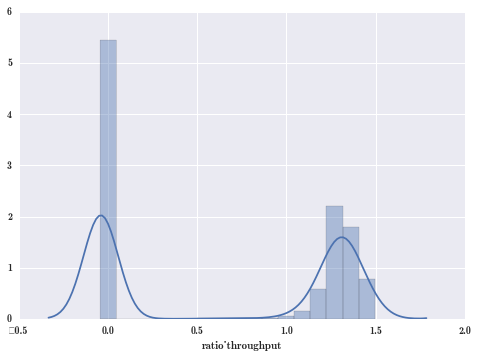

In [9]:
df['ratio_throughput'] = df['Throughput'] / df['Avg Throughput']
sns.distplot(df['ratio_throughput'])

In [ ]:
# find the count of each application 
#z = df[df['application'] == 2]
#z.info()
# bitorrent=55646, netflix = 55636, http = 55627, fb = 55627

In [10]:
c = df.columns.tolist()
v = c[0]
c[0] = c[1]
c[1] = v
df = df[c]

df.to_csv('train_data.csv')

In [11]:
rf = pd.read_csv('train_data.csv', index_col=0)

In [12]:
rf.head()

,application,timestamp,user_1,user_2,user_3,user_4,user_5,user_6,user_7,user_8,...,Avg Throughput,Min Throughput,Max Throughput,Total Bytes Sent,Total Bytes Sent By Source,Total Bytes Sent By Destination,Total Bytes Received,Total Bytes Received By Source,Total Bytes Received By Destination,ratio_throughput
16,1.0,2000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,13.793680,17.580572,12.287877,14.264658,14.263888,9.455304,14.264658,9.455304,14.263888,1.241573
19,1.0,2000.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.816204,17.603096,12.310402,14.287183,14.286476,9.464401,14.287183,9.464401,14.286476,1.241180
62,3.0,4000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,11.740090,-0.001812,10.927435,12.904216,12.885618,9.641769,12.904216,9.641769,12.885618,1.342871
66,3.0,4000.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,11.873622,-0.001812,11.060967,13.037748,13.019149,9.775300,13.037748,9.775300,13.019149,-0.038448
85,0.0,6000.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,12.611308,16.384360,11.116464,14.180899,14.180193,9.358032,14.180899,9.358032,14.180193,1.265091
